In [1]:
import pandas as pd
import numpy as np
from numpy import arange,cos,sin,pi,sqrt,arcsin

%matplotlib inline
import matplotlib.pyplot as plt
from astropy import constants as C

In [2]:
#CONSTANTES
#Constantes del planeta

Pseg=2690*24*3600 #periodo orbital en dias
mtot=0.781*C.M_sun.value #masa de la estrella en masas solares
m2sini= 0.78*C.M_jup.value #masa del planeta en masas de jupiter
dtot=3.20260*C.pc.value #distancia a la tierra en pc
e=0.070

#Constantes
G1=C.G.value
omega2=pi/2

In [3]:
M=0.25*2*pi
E_0=M
E_1=M+e*sin(E_0)
while abs(E_1-E_0)>0.0001:
    E_0=E_1
    E_1=M+e*sin(E_0)


In [4]:
i_min=arcsin(m2sini/(72*C.M_jup.value))


In [5]:
#arrays
Omega2=np.linspace(0,2*pi,100)
i=np.linspace(np.amin(i_min),2*pi,100)

In [6]:
new_i,new_Omega2=np.meshgrid(i,Omega2)

In [7]:
#Coordenadas rectangulares cojn excentricidad diferente de 0
X=np.cos(E_1)-e
Y=sqrt(1-e**2)*np.sin(E_1)

In [8]:
#ponemos todas las funciones para el calculo de los elementos de Thiele-Innes
def Af(atot,Omega2,omega2,i):
    return atot*(cos(Omega2)*cos(omega2)-sin(Omega2)*sin(omega2)*cos(i))
def Bf(atot,Omega2,omega2,i):
    return atot*(sin(Omega2)*cos(omega2)+cos(Omega2)*sin(omega2)*cos(i))
def Ff(atot,Omega2,omega2,i):
    return atot*(-cos(Omega2)*sin(omega2)-sin(Omega2)*cos(omega2)*cos(i))
def Gf(atot,Omega2,omega2,i):
    return atot*(-sin(Omega2)*sin(omega2)+cos(Omega2)*cos(omega2)*cos(i))


In [9]:
#VECTORIZACION DE FUNCIONES
A=np.vectorize(Af)
B=np.vectorize(Bf)
G=np.vectorize(Ff)
F=np.vectorize(Gf)

In [21]:
#Tercera ley de kepler para calcular el semieje mayor en metros
def atota(P,mtot):
    return (P**2*G1*mtot/(4*pi**2))**(1/3)


In [22]:
atotal=np.vectorize(atota)

In [24]:
atot=(atotal(Pseg,mtot)/dtot*180/pi*3600e6)*m2sini/mtot  #sale en muas
atot

C:\Users\Usuario\AppData\Local\Temp/ipykernel_9584/2745298755.py:3: RuntimeWarning: invalid value encountered in double_scalars
  return (P**2*G1*mtot/(4*pi**2))**(1/3)


1037.7177761320572

In [25]:
a1=Af(atot,new_Omega2,omega2,new_i)
b1=Bf(atot,new_Omega2,omega2,new_i)
f1=Ff(atot,new_Omega2,omega2,new_i)
g1=Gf(atot,new_Omega2,omega2,new_i)

In [26]:
#obtención de delta-delta y delta-alpha y su vectorizacion
def deldel(A,X,F,Y):
    return A*X+F*Y
def delalp(B,X,G,Y):
    return B*X+G*Y        
alpa=np.vectorize(delalp)
delpa=np.vectorize(deldel)

In [27]:
alfa1=delalp(a1,X,f1,Y)
delta1=deldel(b1,X,g1,Y)
alfa1 = np.array(alfa1)
delta1 = np.array(delta1)

In [28]:
#AHORA PROCEDEMOS A DEFINIR RHO 
def rho(alfa,delta):
    return sqrt(alfa**2+delta**2)
vec_rho=np.vectorize(rho)

In [29]:
astro_sig=rho(alfa1,delta1)
np.amax(astro_sig)

1042.786080103596

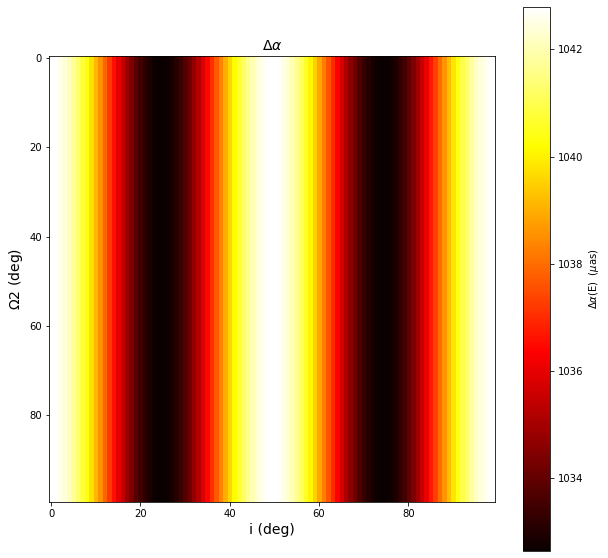

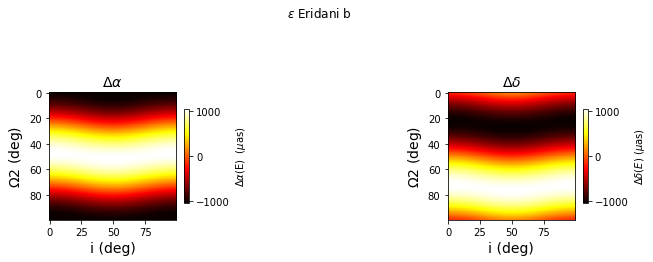

In [54]:
figu=plt.figure(figsize=(10,10))  #tamaño de cada gráfica
figu.subplots_adjust(hspace=1.5,wspace=1.5)
figu.suptitle('$\epsilon$ Eridani b')       

            #subplot 1
ax1=figu.add_subplot(2,2,1)
img1=ax1.imshow(alfa1,cmap='hot')
ax1.set_xlabel('i (deg)',size = 14)
ax1.set_ylabel('$\Omega$2 (deg)',size = 14)
ax1.set_title('$\Delta \\alpha$',size = 14)
cbar=plt.colorbar(img1,ax=ax1,shrink=0.6)
cbar.set_label('$\Delta \\alpha$(E)  ($\mu$as)')


            #subplot 2
ax2=figu.add_subplot(2,2,2)
img2=ax2.imshow(delta1,cmap='hot')
ax2.set_xlabel('i (deg)',size = 14)
ax2.set_ylabel('$\Omega$2 (deg)',size = 14)
ax2.set_title('$\Delta  \delta $',size = 14)
cbar=plt.colorbar(img2,ax=ax2,shrink=0.6)
cbar.set_label('$\Delta  \delta (E)$ ($\mu$as)')


